# Heart Failure Prediction

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
# Importing data

df = pd.read_csv('Data/heart_failure_clinical_records.csv')

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## EDA

Text(0.5, 1.0, 'Count of Male and Female')

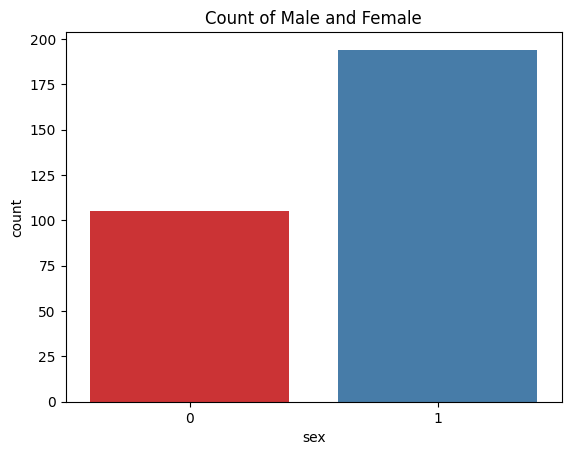

In [9]:
# count of male and female
sns.countplot(x="sex", data=df, palette="Set1")
plt.title("Count of Male and Female")

Text(0.5, 1.0, 'Box plot of Age')

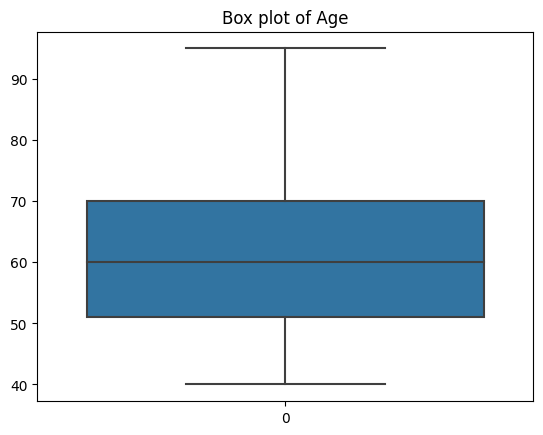

In [10]:
sns.boxplot(df.age)
plt.title("Box plot of Age")

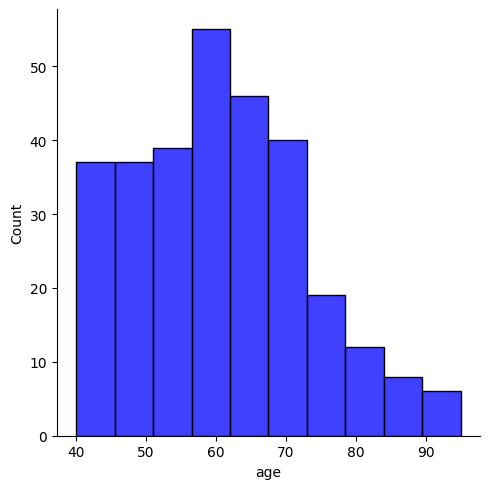

In [11]:
# View the distribution of `age` variable
x = df['age']
sns.displot(x, bins=10, color='blue')
plt.show()

In [12]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [13]:
# plot correlation heatmap to find out correlations
df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('ocean_r'), axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.0,0.08801,-0.08158,-0.101,0.0601,0.09329,-0.05235,0.1592,-0.04597,0.06543,0.01867,-0.2241,0.2537
anaemia,0.08801,1.0,-0.1907,-0.01273,0.03156,0.03818,-0.04379,0.05217,0.04188,-0.09477,-0.1073,-0.1414,0.06627
creatinine_phosphokinase,-0.08158,-0.1907,1.0,-0.009639,-0.04408,-0.07059,0.02446,-0.01641,0.05955,0.07979,0.002421,-0.009346,0.06273
diabetes,-0.101,-0.01273,-0.009639,1.0,-0.00485,-0.01273,0.09219,-0.04698,-0.08955,-0.1577,-0.1472,0.03373,-0.001943
ejection_fraction,0.0601,0.03156,-0.04408,-0.00485,1.0,0.02444,0.07218,-0.0113,0.1759,-0.1484,-0.06731,0.04173,-0.2686
high_blood_pressure,0.09329,0.03818,-0.07059,-0.01273,0.02444,1.0,0.04996,-0.004935,0.03711,-0.1046,-0.05571,-0.1964,0.07935
platelets,-0.05235,-0.04379,0.02446,0.09219,0.07218,0.04996,1.0,-0.0412,0.06212,-0.1251,0.02823,0.01051,-0.04914
serum_creatinine,0.1592,0.05217,-0.01641,-0.04698,-0.0113,-0.004935,-0.0412,1.0,-0.1891,0.00697,-0.02741,-0.1493,0.2943
serum_sodium,-0.04597,0.04188,0.05955,-0.08955,0.1759,0.03711,0.06212,-0.1891,1.0,-0.02757,0.004813,0.08764,-0.1952
sex,0.06543,-0.09477,0.07979,-0.1577,-0.1484,-0.1046,-0.1251,0.00697,-0.02757,1.0,0.4459,-0.01561,-0.004316


In [14]:
# Spliting target variable

X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [15]:
## Split data into separate training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [16]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((239, 12), (60, 12))

In [17]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=123)

In [18]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [19]:
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred) *100

80.0

In [21]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

Confusion matrix
 [[31  4]
 [ 8 17]]


<AxesSubplot:>

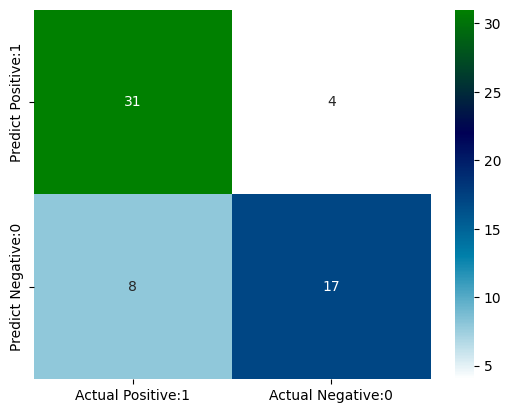

In [22]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='ocean_r')

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.81      0.68      0.74        25

    accuracy                           0.80        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
# parameters
param_grid = { 
    'n_estimators': [200, 500, 1000, 2000],
    'max_depth' : [4,5,6,7,8,9],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'min_samples_leaf':[1,2,3,4,5]
}



In [27]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 500, 1000, 2000]})

In [28]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'n_estimators': 500}

In [29]:
rfr_model = RandomForestClassifier(criterion='gini',max_depth=4,max_features='auto',n_estimators=200)

In [30]:
rfr_model.fit(X_train, y_train)

/home/rahul/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=4, max_features='auto', n_estimators=200)

In [31]:
# Predict the Test set results
y_pred_rfr = rfr_model.predict(X_test)



In [32]:
rfr_acc = accuracy_score(y_test, y_pred_rfr) *100
f1_rfr = f1_score(y_test, y_pred_rfr)
pre_rfr = precision_score(y_test, y_pred_rfr)
recall_rfr = recall_score(y_test, y_pred_rfr)

In [33]:
resultsRFR = pd.DataFrame({'Accuracy':rfr_acc,
                          'f1_score':f1_rfr,
                          'Precision_score': pre_rfr,
                          'Recall_Score':recall_rfr }
                           ,index=['Random Forest Classifier'])

resultsRFR

,Accuracy,f1_score,Precision_score,Recall_Score
Random Forest Classifier,80.0,0.714286,0.882353,0.6


In [34]:
gbm_clf = GradientBoostingClassifier()

In [35]:
gbm_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [36]:
# Predict the Test set results
y_pred_gbm = gbm_clf.predict(X_test)

In [37]:
gbm_acc = accuracy_score(y_test, y_pred_gbm) *100
f1_gbm = f1_score(y_test, y_pred_gbm)
pre_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)

In [38]:
resultsGBM = pd.DataFrame({'Accuracy':gbm_acc,
                          'f1_score':f1_gbm,
                          'Precision_score': pre_gbm,
                          'Recall_Score':recall_gbm }
                           ,index=['Gradient Boosting Classifier'])


results2 = pd.concat([resultsGBM,resultsRFR])

results2

,Accuracy,f1_score,Precision_score,Recall_Score
Gradient Boosting Classifier,81.666667,0.755556,0.850000,0.68
Random Forest Classifier,80.000000,0.714286,0.882353,0.60
